<div dir="rtl">
<b>فصل چهارم - ترین مدل های خطی</b>
<br>
<i>توی این فصل به معرفی مدل های خطی رگرسیون و نحوه کارشون میپردازیم.</i>

<h4> انواع پکیچ ها و کاربردهای ان </h4>

</div>



In [2]:
# Python ≥3.5 is required
import sys
# بررسی اینکه نسخه پایتون حداقل ۳.۵ است
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
# یکی از معروف ترین کتابخانه های یادگیری ماشین در پایتون

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
# کتابخانه کار با اعداد
import numpy as np
# کتابخانه رابط پایتون و موارد مربوط به سیستم عامل
import os

# to make this notebook's output stable across runs
# سید برای اعداد رندوم تا شبیه خروجی در راستای خاصی باشند 
np.random.seed(42)

# To plot pretty figures
# موارد لازم برای رسم و ذخیره کردن نمودارها
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
# محل ذخیره سازی نمودار


PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
# تابع ذخیره سازی نمودار 
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# برای اینکه اگر به خطای خاصی برخورد کردیم نادیدش بگیریم
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings(action="ignore", message="^")

<div dir="rtl">

<h4> رگرسیون خطی و معادله نرمال</h4>
    <h4>Linear regression using the Normal Equation</h4>
    توی این بخش به بررسی رگرسیون خطی در پایه ترین حالت یعنی معادله نرمال میپردازیم
<br>
    برای شروع یک مقدار داده رو ایجاد میکنیم
</div>



In [3]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


Saving figure generated_data_plot


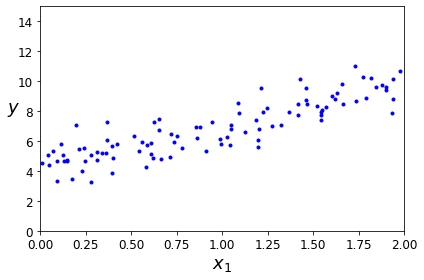

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()


<div dir="rtl">
    با کمک معادله نرما بیایم وتتا رو در کمینه ترین حالت محاسبه کنیم
</div>




In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])


<div dir="rtl">
حالا با توجه به پارامتر هایی که داریم بیایم پیش بینی کنیم </div>




In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

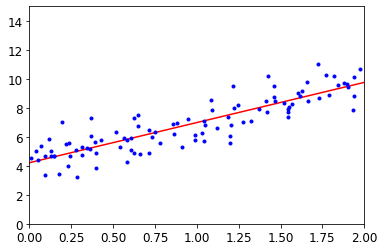

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<div dir="rtl">
باتوجه به معادله خطی که پیدا کردیم حالا بیایم و این رو در حالت معادله خط نمون بدیم که خط مورد پیش بینی به چه شکل هست </div>

Saving figure linear_model_predictions_plot


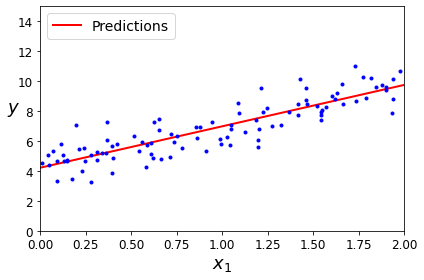

In [10]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

<div dir="rtl">
حالا با کمک مدل های سایکیت لرن این پیش بینی رو انجام بدیم
</div>

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

<div dir="rtl">
مدل LinearRegression بر پایه scipy.linalg.lstsq() است که میتونیم مستقیما ازش استفاده کنیم
</div>

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [15]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

<div dir="rtl">

<h4> رگرسیون خطی با فاصله گرادیان ( نسخه بچ)</h4>
    <h4>Linear regression using batch gradient descent</h4>
    در این روش با کمک فاصله گرادیان میایم و محاسبه میکنیم که پارامتر های رگرسیون خطی به چه شکل است
    <br>
</div>



In [28]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [17]:
theta

array([[4.21509616],
       [2.77011339]])

In [18]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [19]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)


<div dir="rtl">
نحوه تغییرات رگرسیون خطی با نسخه یادگیری های متفاوت

<ul>
<li>نرخ کم : یادگیری سریع تر - ممکنه به بهترین پارامترها نرسیم</li>
<li>نرخ یادگیری زیاد: یادگیری خیلی کند و طولانی - ممکن است در مینیموم محلی گیر کنیم</li>
</ul>
<br>
انتخاب نرخ یادگیری مناسب و میزان دور های یادگیری مناسب از پارامتر های مهم یک رگرسیون خطی و بعد تر در شبکه های عصبی هست.
</div>



Saving figure gradient_descent_plot


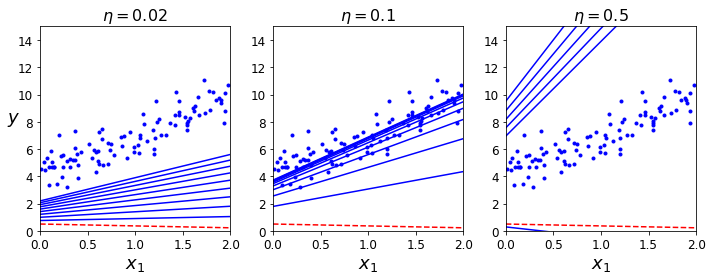

In [20]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

<div dir="rtl">

<h4> رگرسیون خطی با فاصله گرادیان تصادفی</h4>
    <h4>Stochastic Gradient Descent</h4>
مشکلاتی که در نسخه قبلی با کمک انتخاب تصادفی نمونه از نمونه های اموزش میتونیم رفع کنیم و آموزش رو خیلی سریع تر کنیم
    <br>
</div>



In [25]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

Saving figure sgd_plot


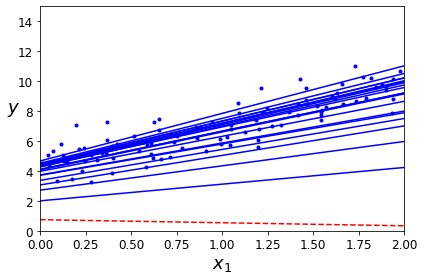

In [30]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

In [31]:
theta

array([[4.21526258],
       [2.85134849]])



<div dir="rtl">
همانطور که دیدید در این جا سریع تر به یک بهینگی پارامتری رسیدیدم.
<br>
برای استفاده از کتاب خانه سایکیت لرن میتونیم به این شکل فراخوانی کنیم
</div>




In [33]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [34]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

<div dir="rtl">

<h4> رگرسیون خطی با فاصله گرادیان مینی بچ</h4>
    <h4>Mini-batch gradient descent</h4>
یکی از مشکلات بخش قبلی این بود که فقط یک داده رو هر بار میبینه که وقتی میزان داده ها زیاد هست حتی اگر عادلانه برخورد کنه بازم به همه داده ها نمی رسه. توی مینی بچ میایم داده ها رو توی دسته های کوچیک میدیم به مدل تا اینطوری هم مسئله تصادفی رو داشته باشیم و هم مقدار داده بیشتر رو تزریق کنیم به مدل
    <br>
</div>



In [35]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [37]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [38]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


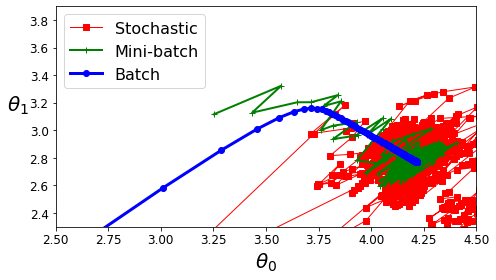

In [39]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

<div dir="rtl">
همانطور که از تصویر مشخص است اگر ما فاصله گرادیان معمولی داشته باشیم و همه داده ها رو تزریق کنیم راحتر میرسیم ولی به خاطر مسئله رم بهترین رویکرد مینی-بچ است
</div>



<div dir="rtl">

<h4> رگرسیون چندجمله ای</h4>
    <h4>Polynomial Regression</h4>
تا الان درباره رگرسیون خطی صحبت کردیم. حالا اگر داده ها از حالت خطی بیرون بیان چی؟    <br>
</div>



In [40]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [41]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [45]:
X[0] , y[0]

(array([-0.75275929]), array([1.61761105]))

In [46]:
X.shape , y.shape

((100, 1), (100, 1))

Saving figure quadratic_data_plot


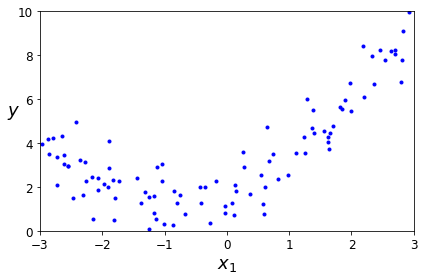

In [47]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

<div dir="rtl">
همانطور که توی تصویر مشخص هست داده های ما به شکلی نیستند که بشه صرفا با یک خط ساده اونها رو پیش بینی کرد.نزدیک ترین حالت شبیه تابع x به توان دو ریاضی هستند
<br>
یکی از راه حل هایی که داریم این هست که داده ها رو از حالت چند جمله ای به حالت خطی ببریم با کمک PolynomialFeatures میتونیم این کار رو کنیم
    
</div>



In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [50]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [51]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


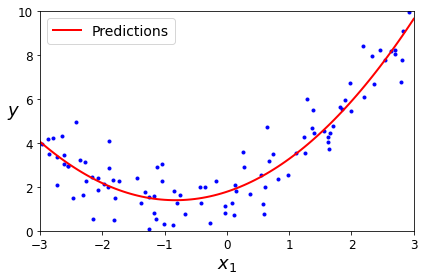

In [52]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

<div dir="rtl">
حالا اگر این درجه رو از دو ببریم به ۳۰۰ مدل بهتری میگیریم؟ نه لزوما
    
</div>



Saving figure high_degree_polynomials_plot


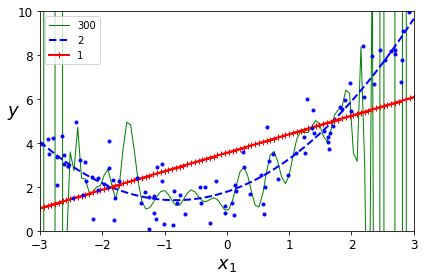

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

<div dir="rtl">
<b>نمودار یادگیری</b>
    <br>
<b>Learning Curves</b>
    <br>
برای مقایسه بهتر بیایم ببینیم میزان داده ها چه تاثیری روی یادگیری داره با کمک یک نمودار یادگیری
    </div>



In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

Saving figure underfitting_learning_curves_plot


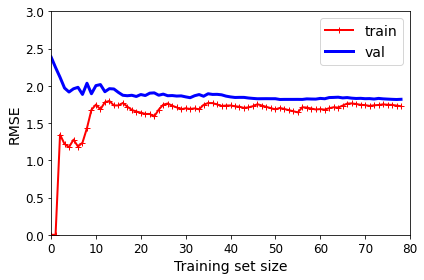

In [55]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown



<div dir="rtl">
ابتدا از یک مدل خطی ساده استفاده میکینم میبینم که با افزایش داده ها میزان لاس بیشتر شده ولی فاصله بین اموزش و اعتبار سنجی خیلی کم هست
<br>
این به ما میگه که مدل به خوبی یاد نگرفته هنوز و یکی از کارها استفاده از مدل پیچیده تر هست
</div>



Saving figure learning_curves_plot


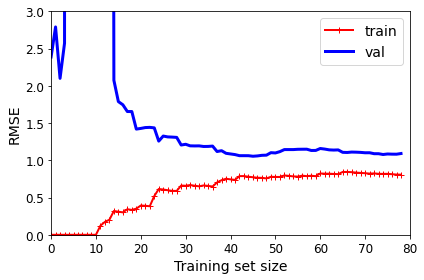

In [56]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown




<div dir="rtl">
ابتدا از یک مدل خطی ساده استفاده میکینم میبینم که با افزایش داده ها میزان لاس بیشتر شده ولی فاصله بین اموزش و اعتبار سنجی خیلی کم هستبا کمک یک مدل پیچیده تر ابتدا یکم اورفیت رو شاهد هستیم و کم کم با اضافه کردن داده های جدید به مدلمون میتونیم ببینم که روی داده های اعتبار سنجی لاس کمتری رو داریم و تا حدودی وضعیت مدل بهتر از قبل هست اما هنوز فاصله بین داده های تست و آموزشی قابل توجه است
ا میگه که مدل به خوبی یاد نگرفته هنوز و یکی از کارها استفاده از مدل پیچیده تر هست
</div>

